In [1]:
# create 5 histograms: one for each of 5 songs, all representing the sum of each emotion for their song.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import text2emotion as te
from pyplutchik import plutchik

# Pyplutchik tool:
# Semeraro A, Vilella S, Ruffo G (2021) 
# PyPlutchik: Visualising and comparing emotion-annotated corpora 
# PLOS ONE 16(9): e0256503.https://doi.org/10.1371/journal.pone.0256503

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def text2emotion_hist(filename, title) :
    if filename.find(".txt") == -1:
        filename = filename + ".txt"
    
    file1 = open(filename, 'r')
    
    lines = 0
    
    for line in file1:
        b = line.strip()
        if b != "" :
            lines += 1
    
    file1.close()
    
    file1 = open(filename, 'r')
    
    vec = [0,0,0,0,0]
    lines = 0
    
    # Adding each line's ratings
    for line in file1:
        b = line.strip()
        score = te.get_emotion(b)
    
        if b != "" :
            lines += 1
            vec = [vec[0] + score['Happy'], vec[1] + score['Angry'], vec[2] + score['Surprise'], 
                   vec[3] + score['Sad'], vec[4] + score['Fear']]
        
    # Closing file(s)
    file1.close()
    
    #fig = plt.figure()
    #ax = fig.add_axes([0,0,1,1])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    fig.tight_layout()
    emotions = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
    colors = ['gold', 'red', 'deeppink', 'cornflowerblue', 'purple']
    ax1.bar(emotions, vec, color = colors)
    ax1.set_ylabel("Sum Emotion Rating")
    ax1.set_xlabel("Emotion")
    
    total = sum(vec)
    for i in range(0,5):
        vec[i] = vec[i] / total
    
    sums = {
        'joy': vec[0],
        'anger': vec[1],
        'surprise': vec[2],
        'sadness': vec[3],
        'fear': vec[4]
    }
    
    plutchik(sums, ax2)
    
    plt.suptitle("Accumulative Emotion of '" + title + "' (Text2Emotion)", y = 1.05)
    
    plt.sca(ax1)
    plt.title("Bar Chart")
    plt.sca(ax2)
    plt.title("Plutchik")
    plt.show()
    
    return 0

C:\Users\bward\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\bward\anaconda3\lib\site-packages\pyplutchik\pyplutchik.py:770: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s = emotion, xy = p4, rotation = angle2, ha='center', va = 'center',
C:\Users\bward\anaconda3\lib\site-packages\pyplutchik\pyplutchik.py:775: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s = "{0:.2f}".format(round(emotion_score,2)), xy = p5, rotation = angle2, ha='center', va = 'center',


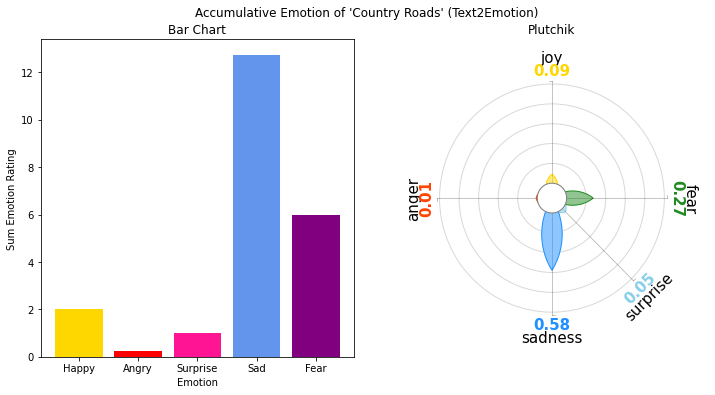

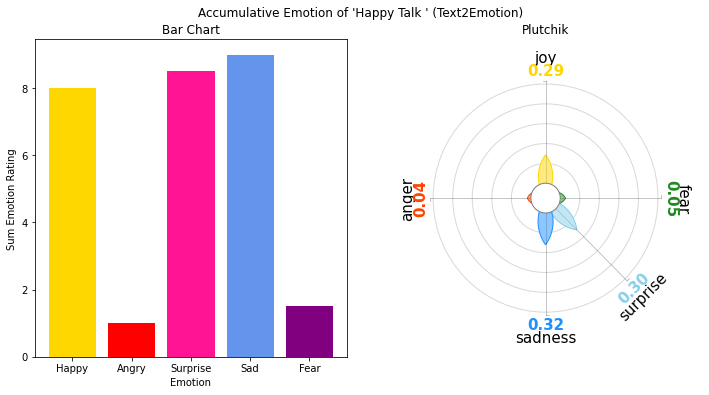

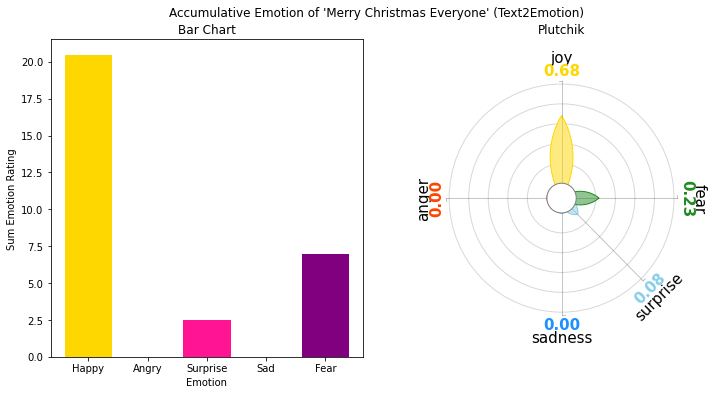

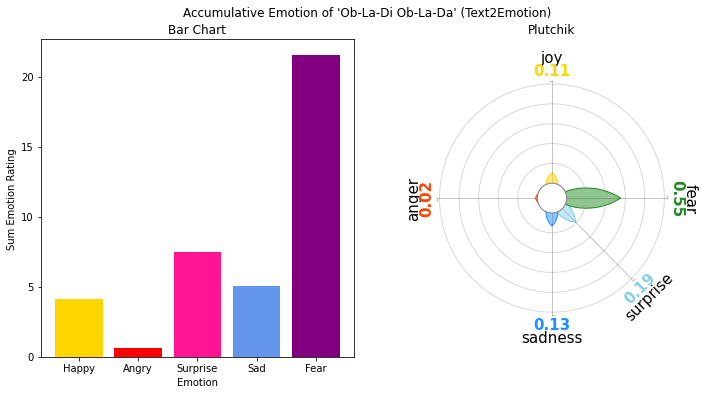

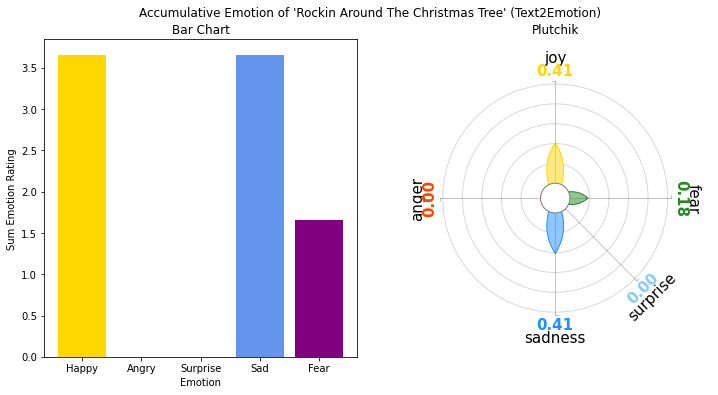

In [3]:
psongs = os.listdir('pos_songs/')
x = 0

for l in psongs :
    filename = "pos_songs/" + l
    l = l.replace(".txt", "")
    l = l.replace("_", " ")
    title = l.title()
    x = text2emotion_hist(filename, title)

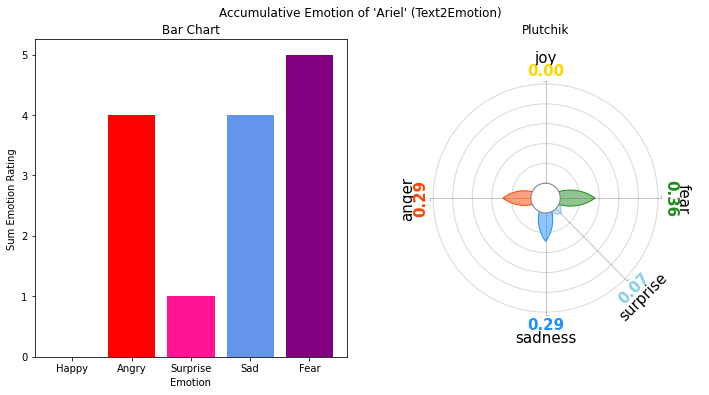

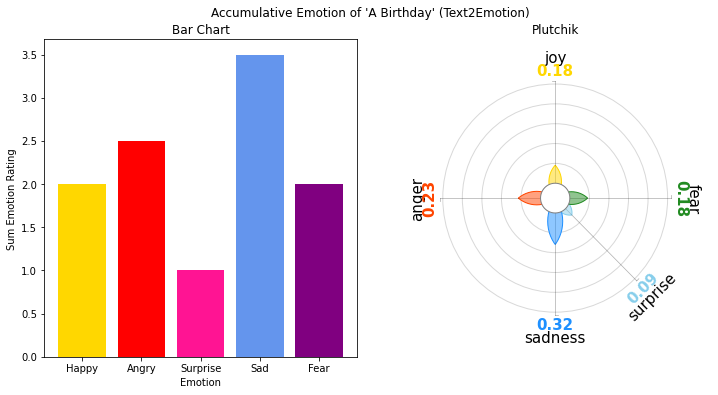

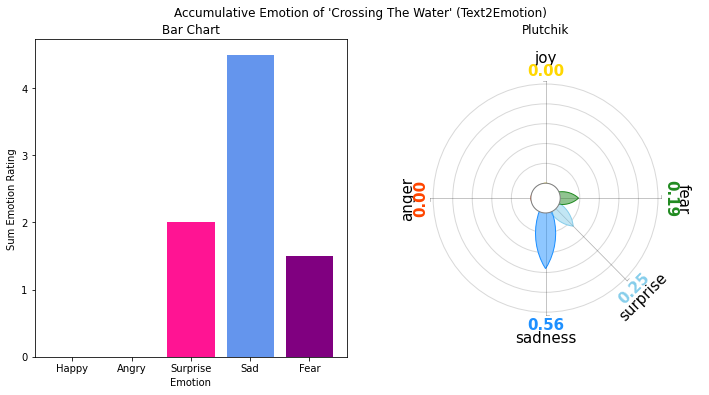

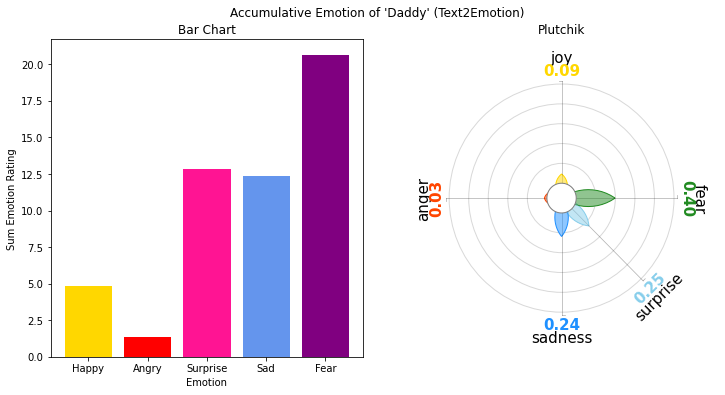

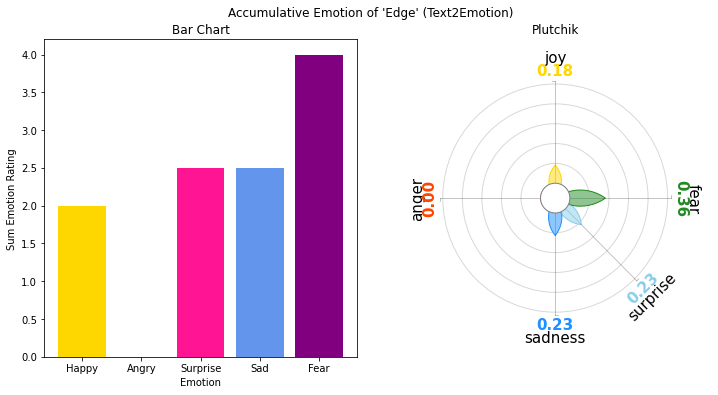

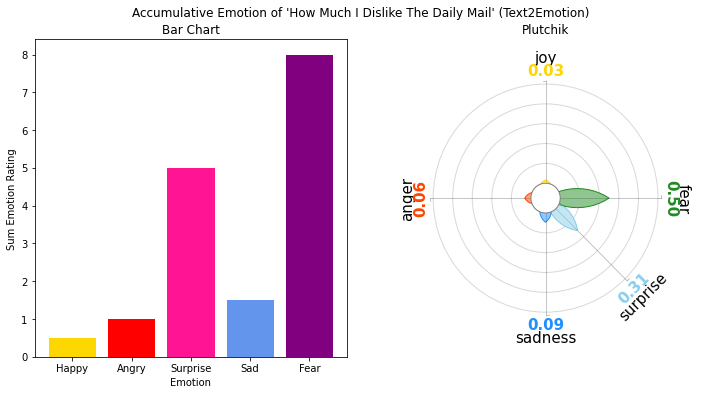

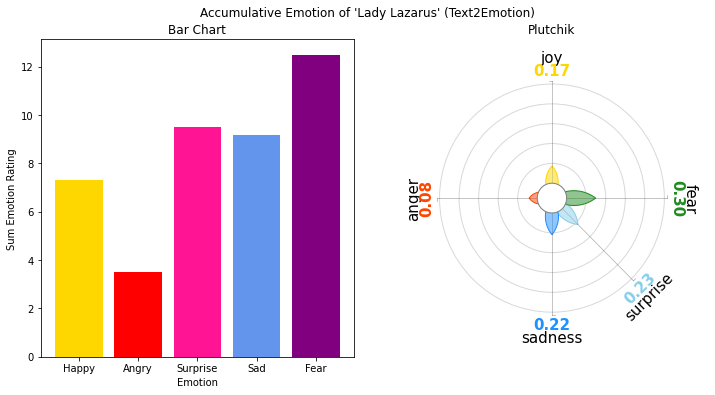

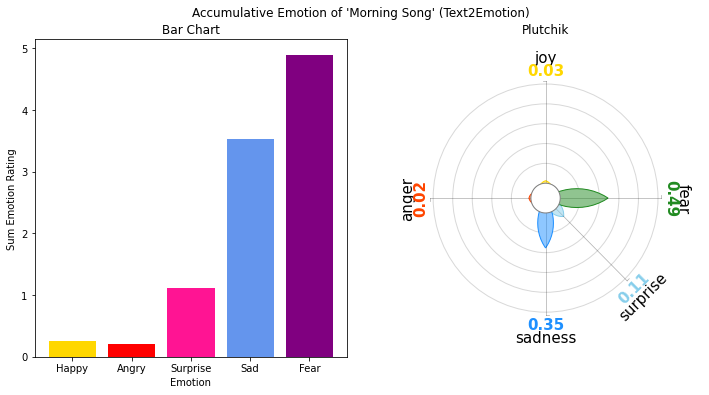

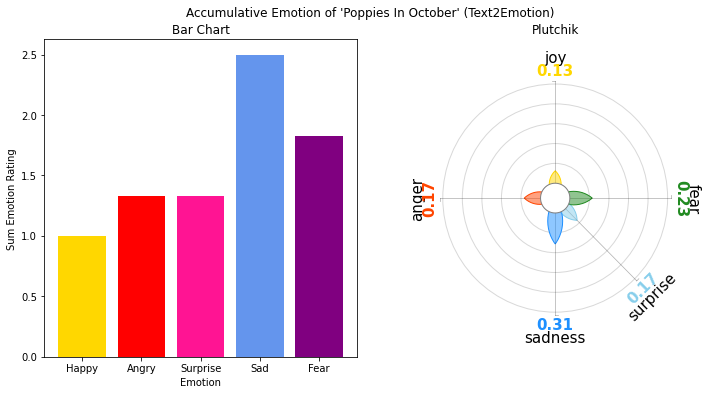

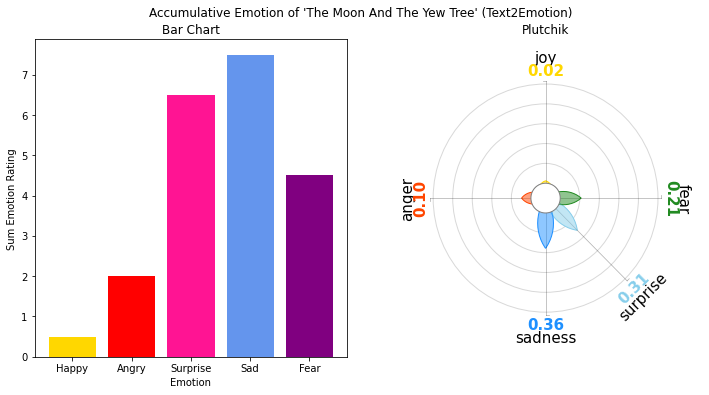

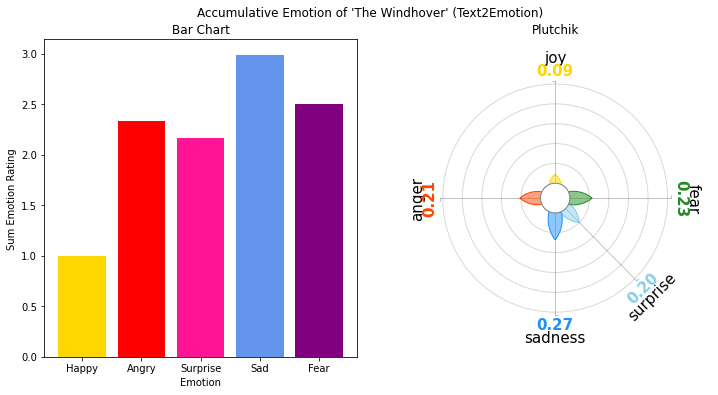

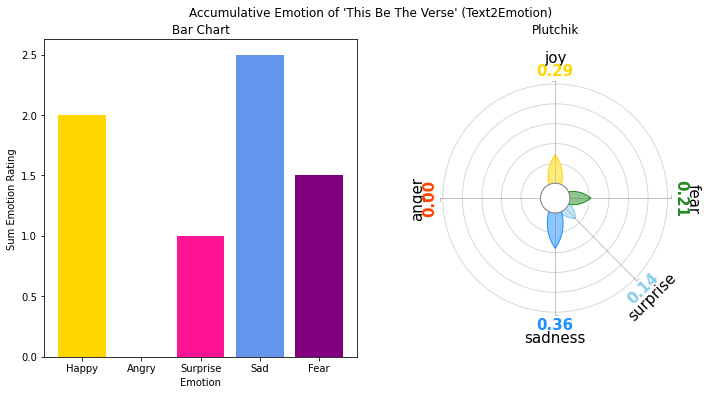

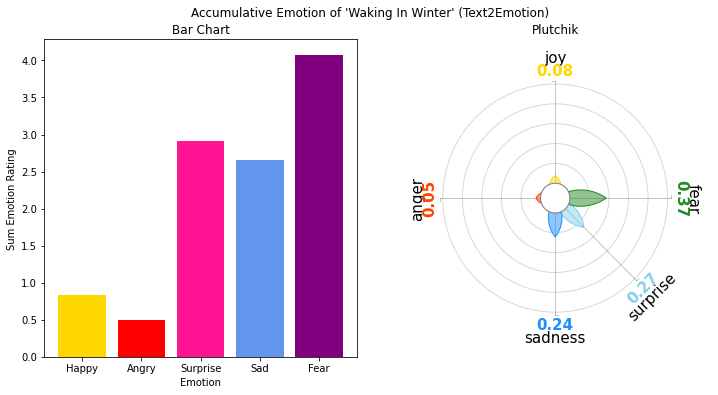

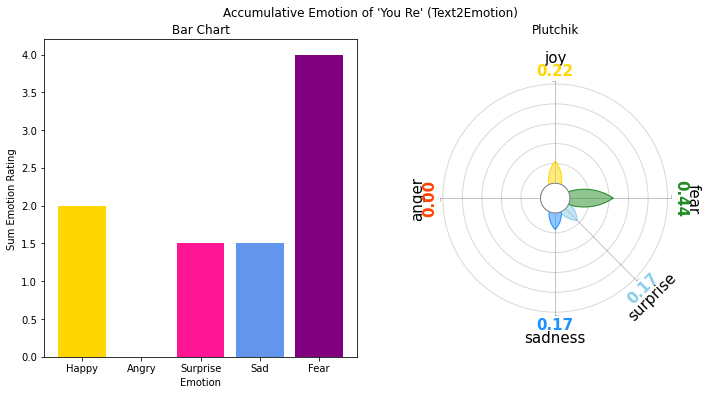

In [10]:
poetry = os.listdir('../poetry/')
x = 0

for l in poetry :
    filename = "../poetry/" + l
    l = l.replace(".txt", "")
    l = l.replace("_", " ")
    title = l.title()
    x = text2emotion_hist(filename, title)

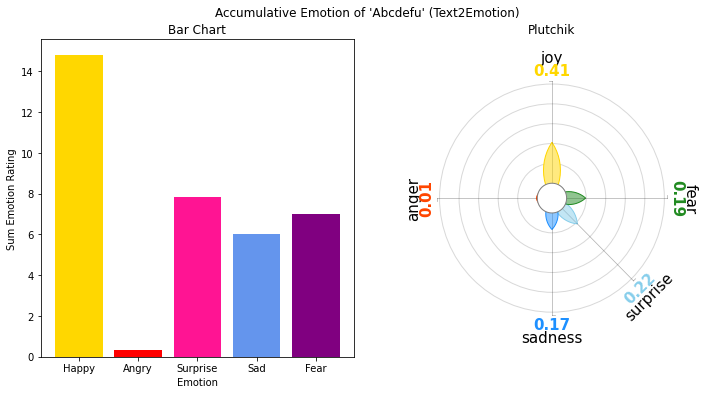

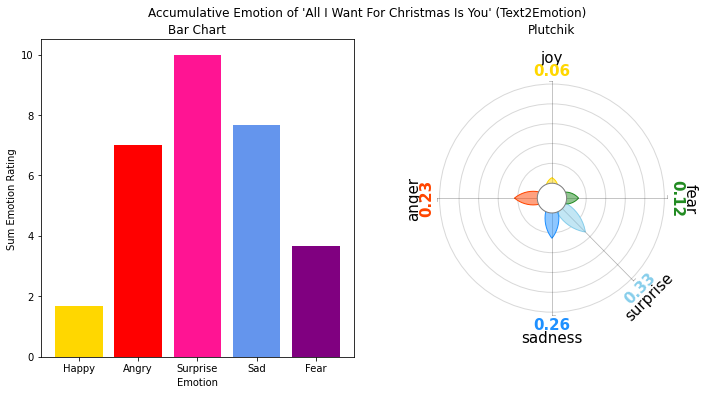

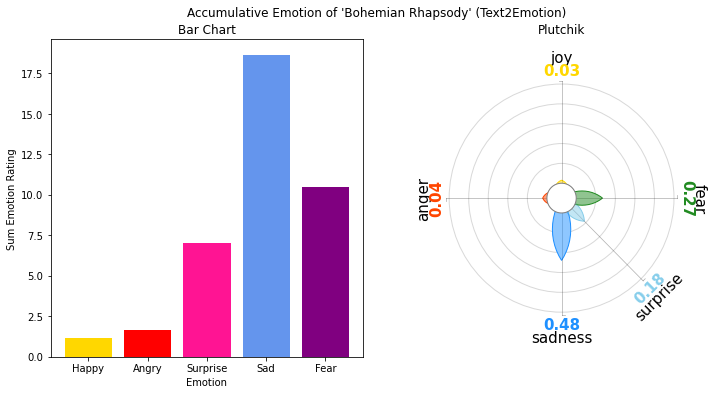

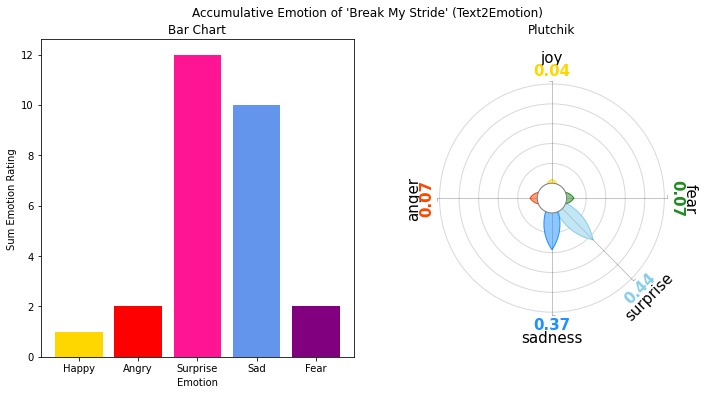

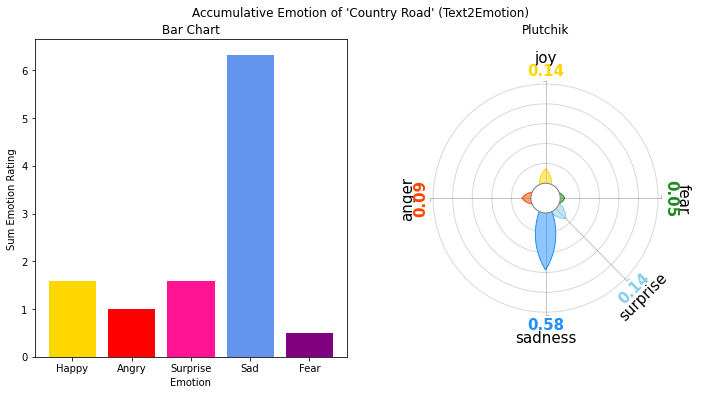

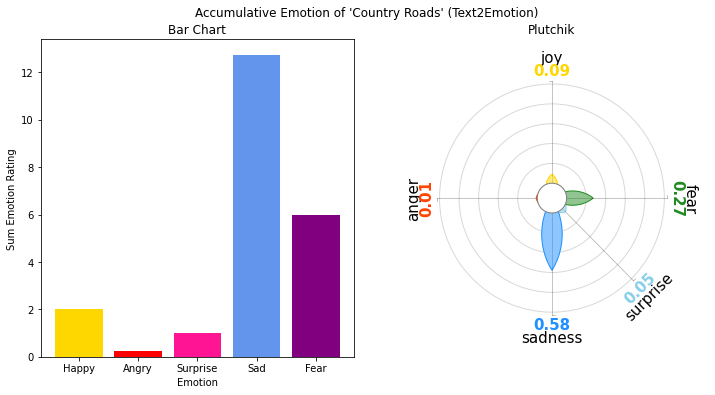

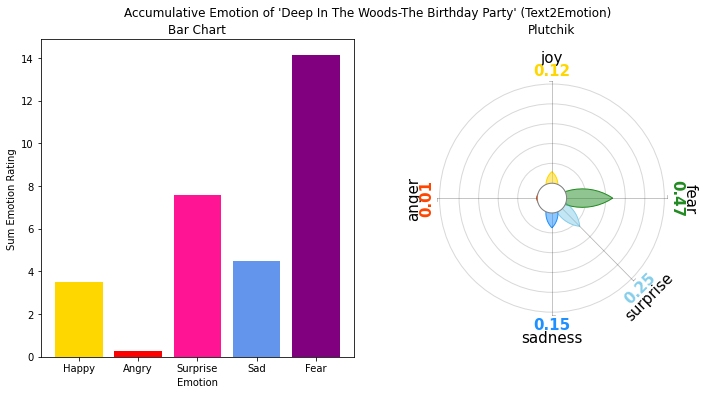

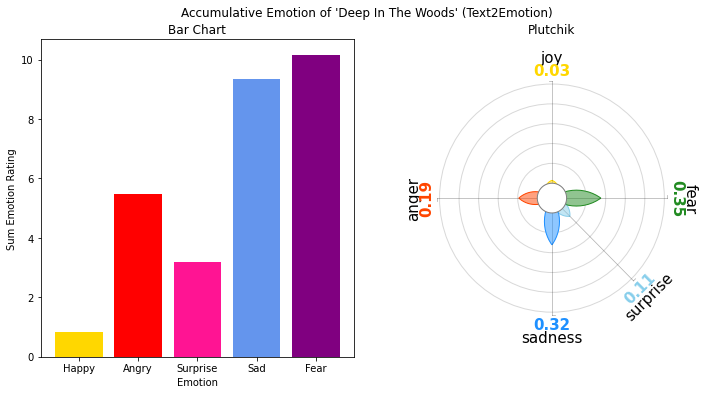

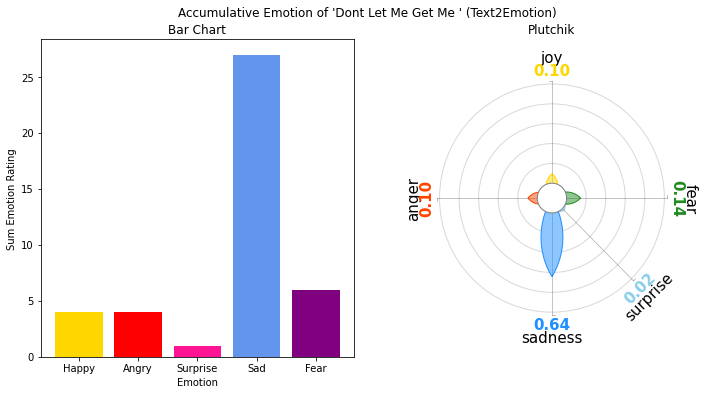

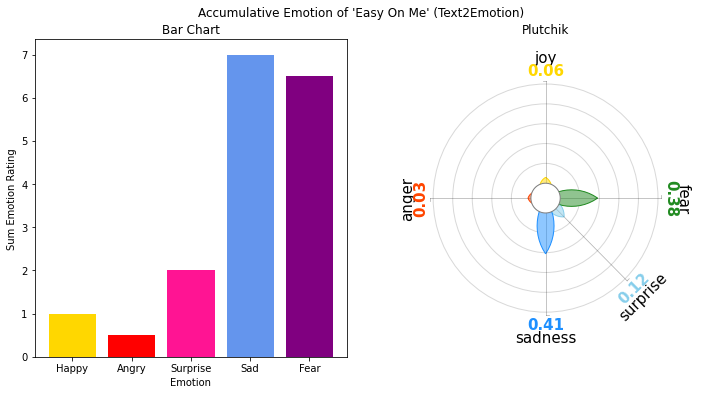

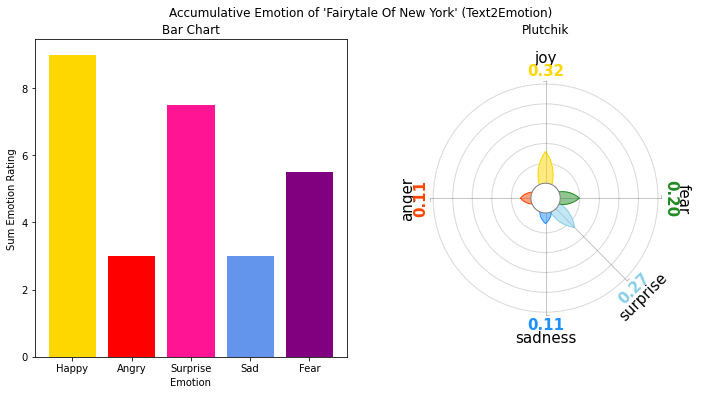

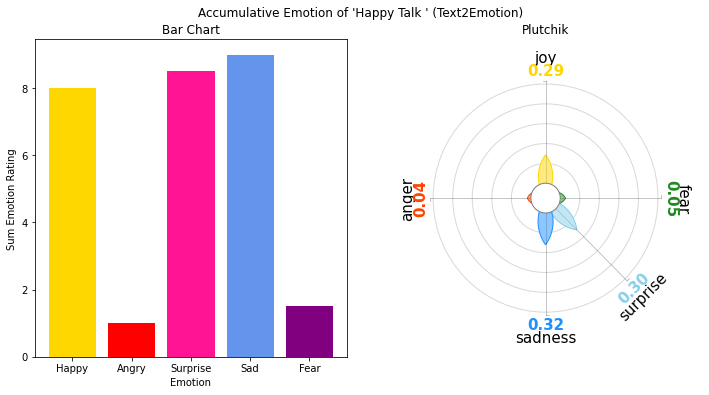

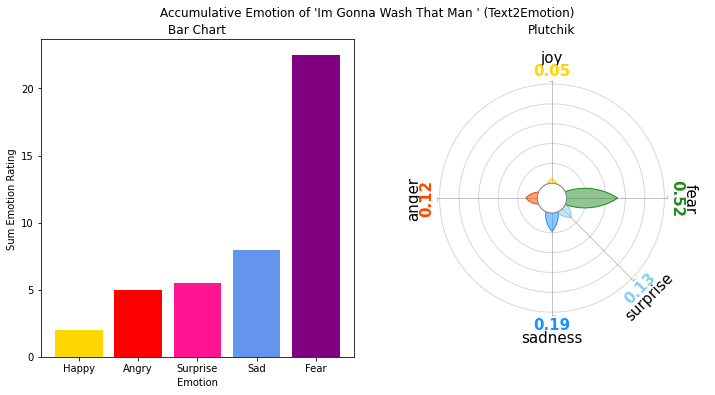

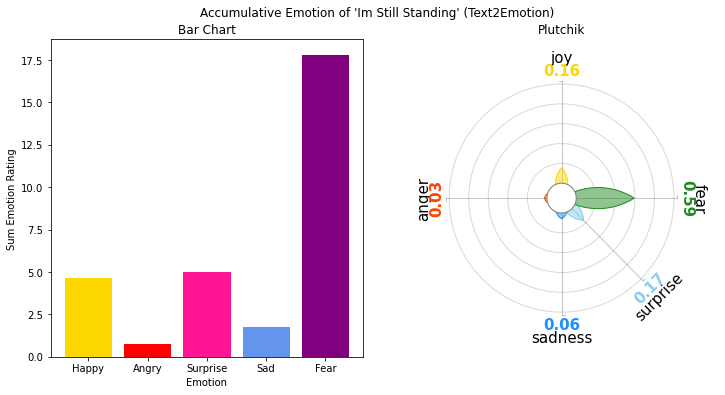

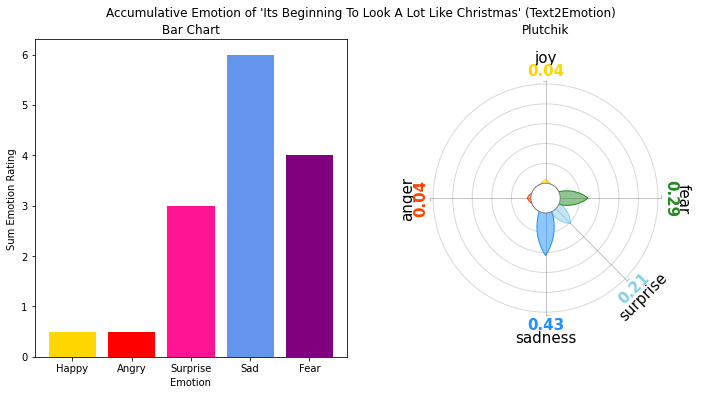

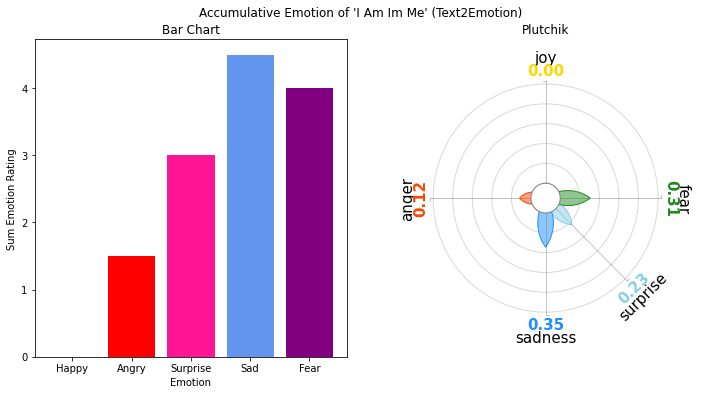

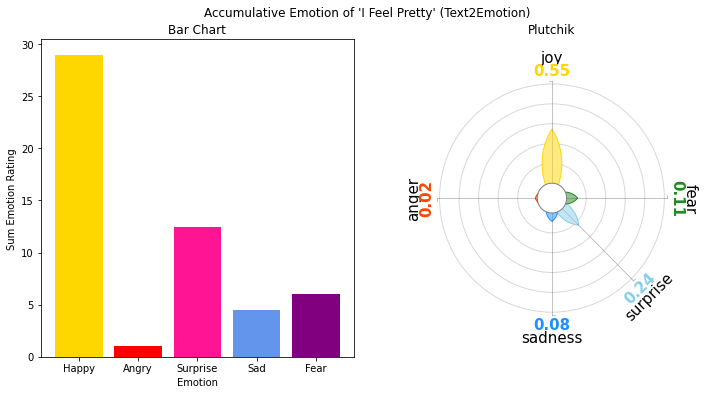

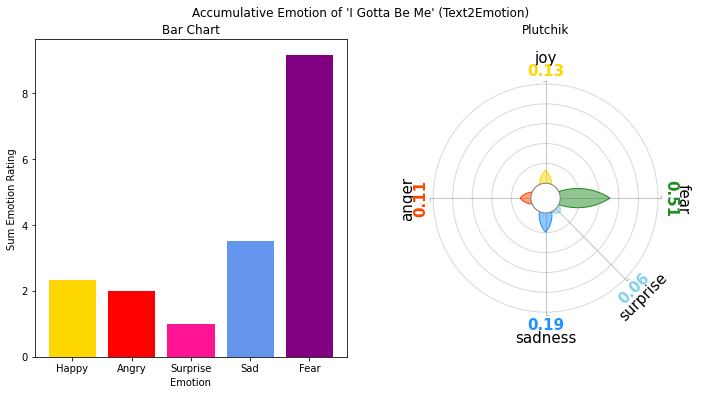

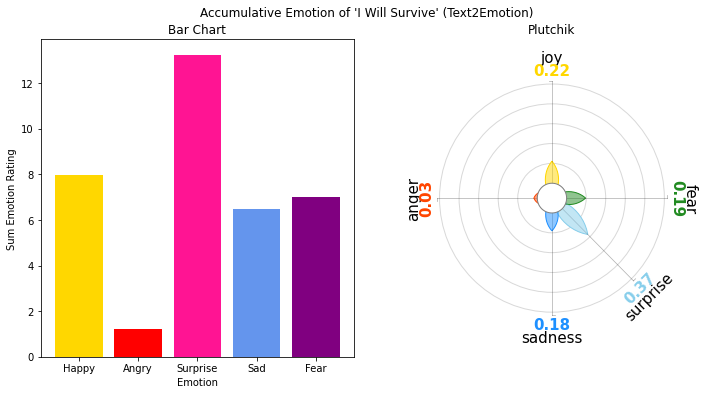

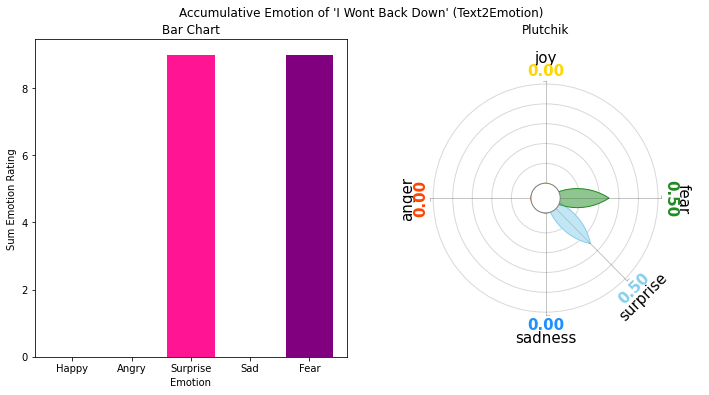

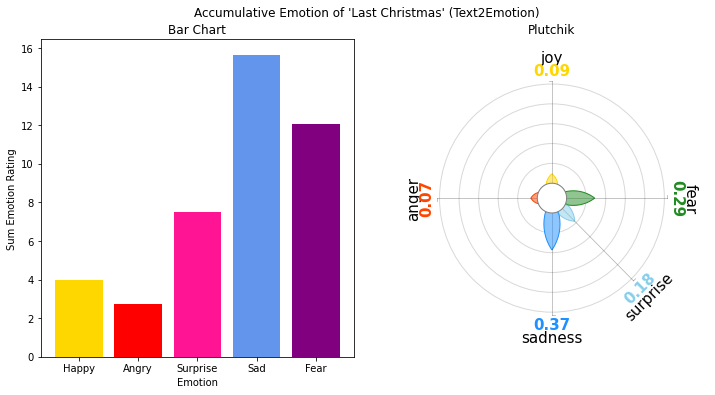

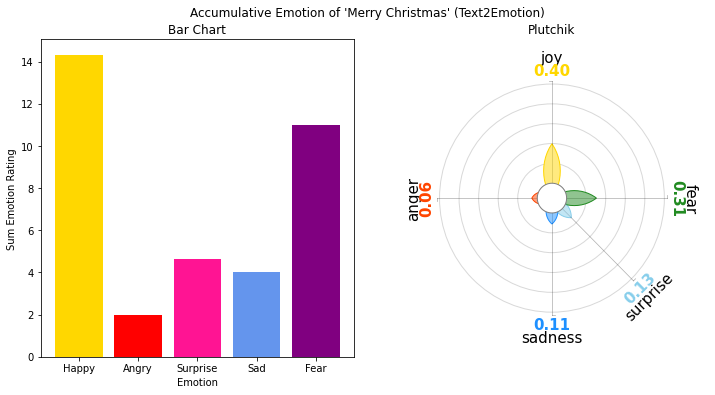

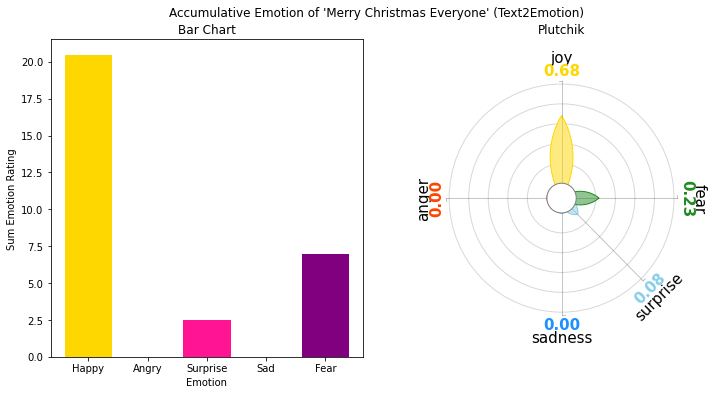

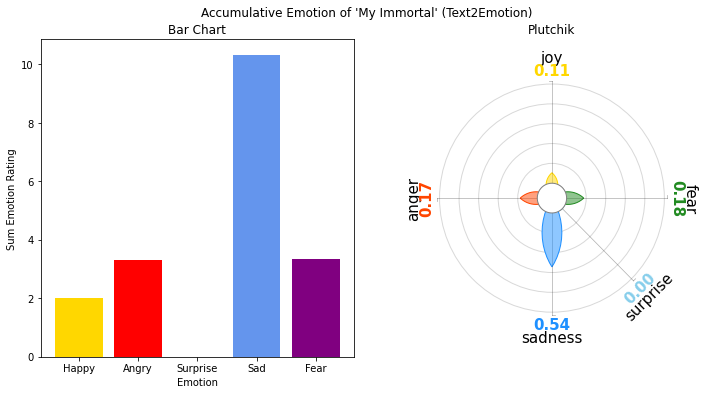

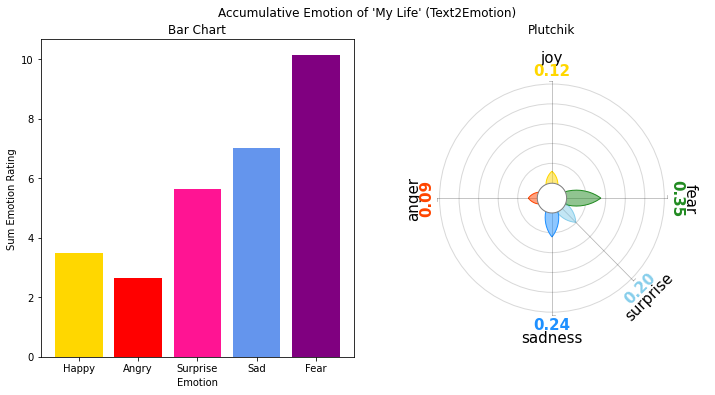

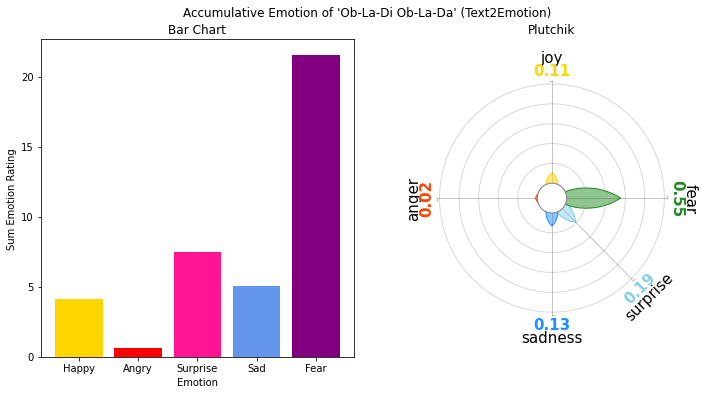

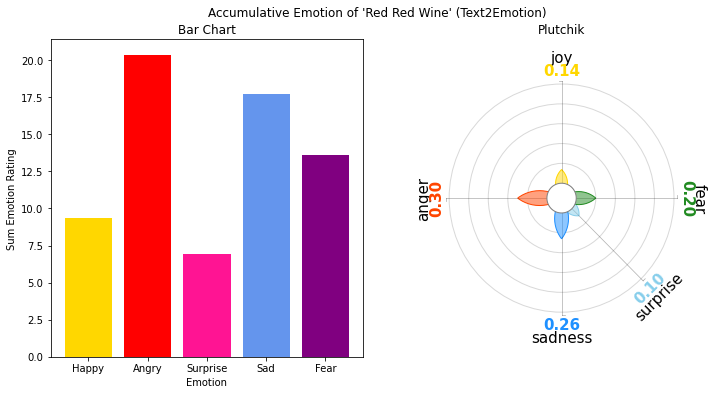

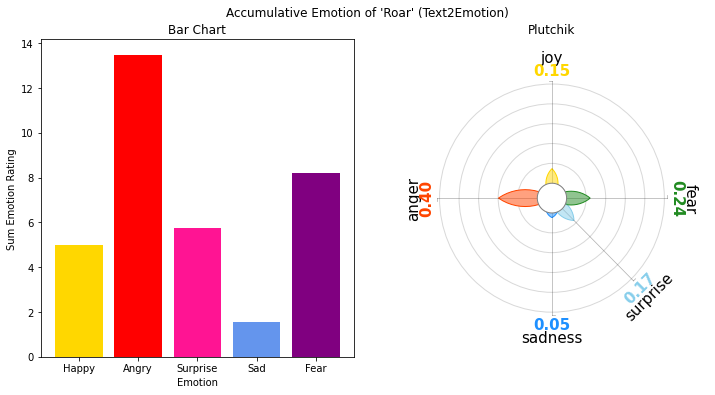

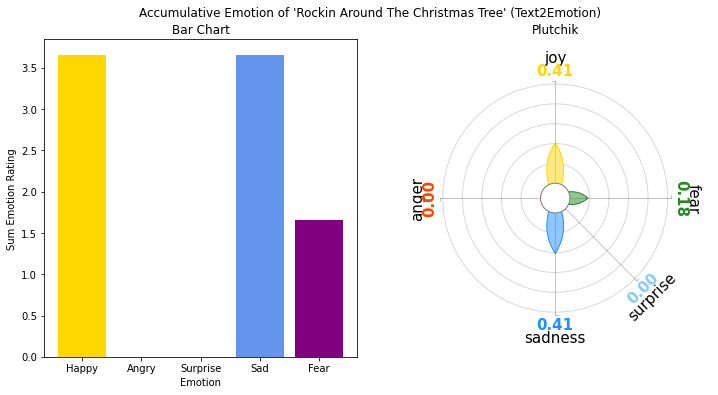

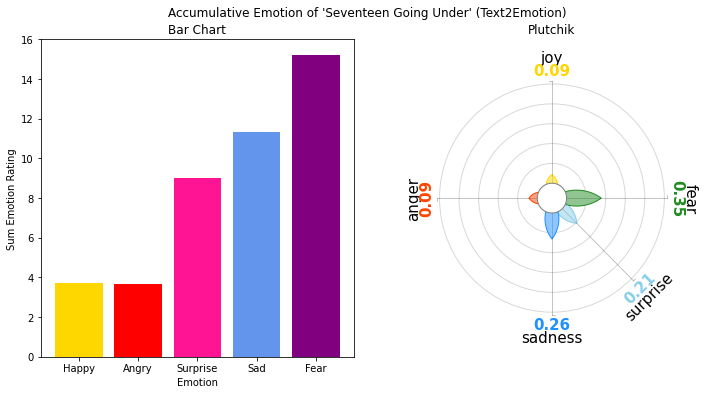

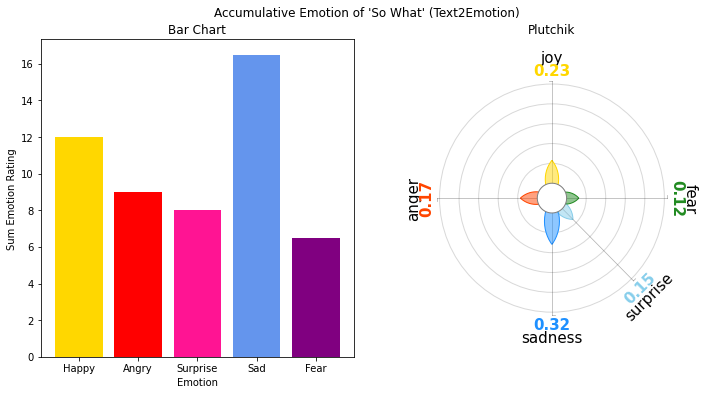

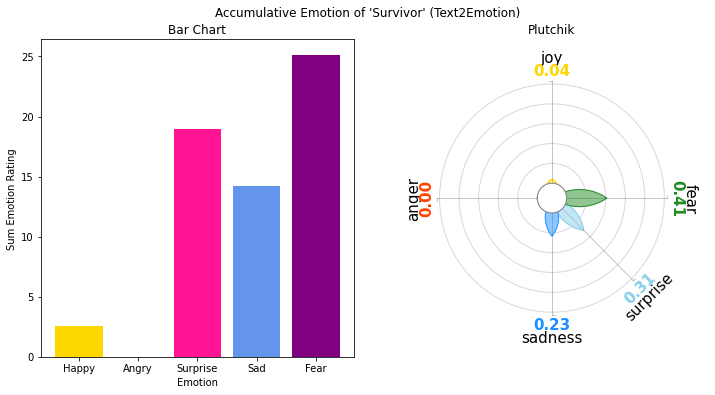

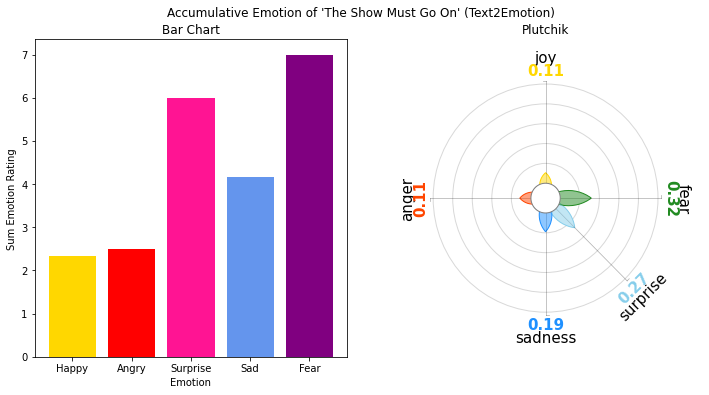

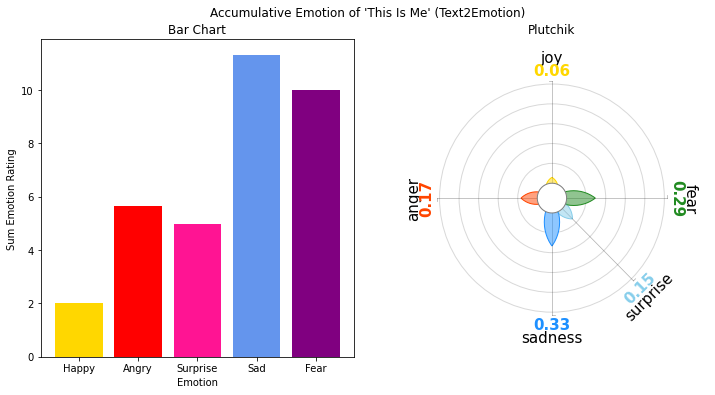

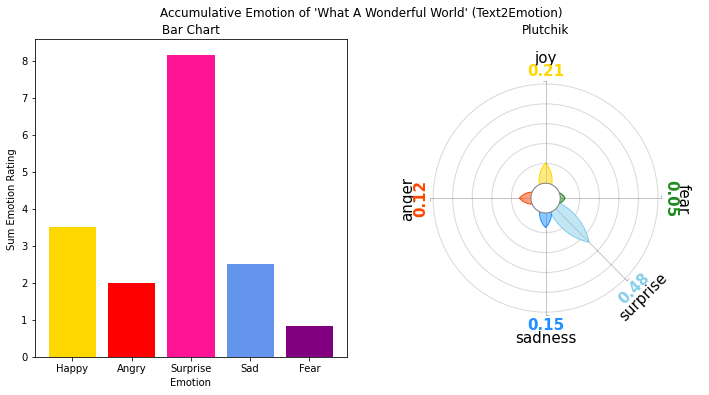

In [11]:
lyrics = os.listdir('../lyrics/')
x = 0

for l in lyrics :
    filename = "../lyrics/" + l
    l = l.replace(".txt", "")
    l = l.replace("_", " ")
    title = l.title()
    x = text2emotion_hist(filename, title)